In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import re

In [2]:
# Load the questionnaire data
questionnaire_df = pd.read_excel('data/questionnaire_data-561422-2025-11-17-1240.xlsx')

/home/michaelt/.cache/pypoetry/virtualenvs/in9060-as2-Pf7P2CoS-py3.12/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
# Rename questionnaire_df columns to concise snake_case with condition suffixes


# Mapping from full question text to short code
_base_map = {
    'Participant number': 'participant_id',
    'What is your gender': 'gender',
    'How old are you?': 'age',
    'What is your dominant hand?': 'dominant_hand',
    'How experienced are you with robotic systems?': 'robotics_experience',
    'Did you experience delays between your actions and the robot\'s movements?': 'delay',
    'How difficult was it to perform the task?': 'difficulty',
    'I felt like I was controlling the movement of the robot': 'control',
    'It felt like the robot was part of my body': 'body'
}

repeating_keys = {'delay','difficulty','control','body'}
rename_map = {}
for col in questionnaire_df.columns:
    if col.startswith('$'):  # keep metadata columns unchanged
        continue
    # Remove HTML entity artifacts
    col_clean = col.replace('&#39;', "'")
    # Extract suffix like .1, .2, etc.
    m = re.search(r'\.(\d+)$', col_clean)
    base = re.sub(r'\.(\d+)$', '', col_clean)
    short = _base_map.get(base, None)
    if short is None:
        # If unknown and not metadata, create a generic snake_case key
        generic = re.sub(r'[^A-Za-z0-9]+', '_', base).strip('_').lower()
        short = generic or base.lower()
    if m:
        suffix = f"_{m.group(1)}"  # condition index from original numbering
    elif short in repeating_keys:
        suffix = "_0"  # first occurrence without explicit suffix
    else:
        suffix = ""
    rename_map[col] = short + suffix

questionnaire_df = questionnaire_df.rename(columns=rename_map)

print('Renamed columns (first 25):')
print(list(questionnaire_df.columns)[:25])

Renamed columns (first 25):
['$submission_id', '$created', 'participant_id', 'gender', 'age', 'dominant_hand', 'robotics_experience', 'delay_0', 'difficulty_0', 'control_0', 'body_0', 'delay_1', 'difficulty_1', 'control_1', 'body_1', 'delay_2', 'difficulty_2', 'control_2', 'body_2', 'delay_3', 'difficulty_3', 'control_3', 'body_3', 'delay_4', 'difficulty_4']


In [5]:
# Filter out columns containing "$"
filtered_columns = [col for col in questionnaire_df.columns if '$' not in col and col != 'Participant number']

# Display column names
# print("Column names:")
# print(list(questionnaire_df.columns))
# print(questionnaire_df.columns)

In [10]:
# split into tasks, though we may want to be specific about this
# task_one_columns = filtered_columns[0:24]
# task_two_columns = filtered_columns[0:4] + filtered_columns[24:]
participant_data_columns = filtered_columns[0:4]
task_one_columns = filtered_columns[5:25]
task_two_columns = filtered_columns[25:]

# task_one_df = pd.DataFrame(questionnaire_df[filtered_columns])
# task_two_df = pd.DataFrame(questionnaire_df[filtered_columns])
participant_df = questionnaire_df[participant_data_columns]
task_one_df = questionnaire_df[task_one_columns]
task_two_df = questionnaire_df[task_two_columns]
all_tasks_df = task_one_df + task_two_df



# Calculate mean and variance for the filtered columns
# stats_df = pd.DataFrame({
#     'Mean': questionnaire_df[filtered_columns].mean(numeric_only=True),
#     'Variance': questionnaire_df[filtered_columns].var(numeric_only=True)
# })

# print(stats_df)

In [21]:
# Create metric masks for different question types
metric_mask_delay = [col for col in all_tasks_df.columns if col.startswith('delay_')]
metric_mask_difficulty = [col for col in all_tasks_df.columns if col.startswith('difficulty_')]
metric_mask_control = [col for col in all_tasks_df.columns if col.startswith('control_')]
metric_mask_body = [col for col in all_tasks_df.columns if col.startswith('body_')]

print("Delay columns:", metric_mask_delay)
print("Difficulty columns:", metric_mask_difficulty)
print("Control columns:", metric_mask_control)
print("Body columns:", metric_mask_body)

Delay columns: ['delay_0', 'delay_1', 'delay_2', 'delay_3', 'delay_4', 'delay_5', 'delay_6', 'delay_7', 'delay_8', 'delay_9']
Difficulty columns: ['difficulty_0', 'difficulty_1', 'difficulty_2', 'difficulty_3', 'difficulty_4', 'difficulty_5', 'difficulty_6', 'difficulty_7', 'difficulty_8', 'difficulty_9']
Control columns: ['control_0', 'control_1', 'control_2', 'control_3', 'control_4', 'control_5', 'control_6', 'control_7', 'control_8', 'control_9']
Body columns: ['body_0', 'body_1', 'body_2', 'body_3', 'body_4', 'body_5', 'body_6', 'body_7', 'body_8', 'body_9']


In [32]:
# Show metric columns in task_one_df and task_two_df
# print("TASK ONE METRICS:")
# print("="*50)
task_one_delay_df = task_one_df[[col for col in task_one_df.columns if col.startswith('delay_')]]
task_one_difficulty_df = task_one_df[[col for col in task_one_df.columns if col.startswith('difficulty_')]]
task_one_control_df = task_one_df[[col for col in task_one_df.columns if col.startswith('control_')]]
task_one_body_df = task_one_df[[col for col in task_one_df.columns if col.startswith('body_')]]
task_two_delay_df = task_two_df[[col for col in task_two_df.columns if col.startswith('delay_')]]
task_two_difficulty_df = task_two_df[[col for col in task_two_df.columns if col.startswith('difficulty_')]]
task_two_control_df = task_two_df[[col for col in task_two_df.columns if col.startswith('control_')]]
task_two_body_df = task_two_df[[col for col in task_two_df.columns if col.startswith('body_')]]

# print(f"Delay columns ({len(task_one_delay)}): {task_one_delay}")
# print(f"Difficulty columns ({len(task_one_difficulty)}): {task_one_difficulty}")
# print(f"Control columns ({len(task_one_control)}): {task_one_control}")
# print(f"Body columns ({len(task_one_body)}): {task_one_body}")

# print("\n" + "="*50)
# print("TASK TWO METRICS:")
# print("="*50)

# print(f"Delay columns ({len(task_two_delay)}): {task_two_delay}")
# print(f"Difficulty columns ({len(task_two_difficulty)}): {task_two_difficulty}")
# print(f"Control columns ({len(task_two_control)}): {task_two_control}")
# print(f"Body columns ({len(task_two_body)}): {task_two_body}")

# print("\n" + "="*50)
# print("ALL COLUMNS:")
# print("="*50)
# print(f"Task One columns: {list(task_one_df.columns)}")
# print(f"\nTask Two columns: {list(task_two_df.columns)}")

In [19]:
# Filter task_one_df for male participants
male_mask = participant_df['gender'] == 'Male'
female_mask = participant_df['gender'] == 'Female'
Other_mask = participant_df['gender'] == 'Other'
task_one_male_df = task_one_df[male_mask]
task_one_female_df = task_one_df[female_mask]

# Calculate median age
median_age = participant_df['age'].median()
age_mask_A24 = participant_df['age'] > median_age
age_mask_U24 = participant_df['age'] <= median_age

task_one_age_A24_df = task_one_df[age_mask_A24]
task_one_age_U24_df = task_one_df[age_mask_U24]
task_two_age_A24_df = task_two_df[age_mask_A24]
task_two_age_U24_df = task_two_df[age_mask_U24]


print(f"Median age: {median_age}")
print(f"A24 participants: {age_mask_A24.sum()}")
print(f"U24 participants: {age_mask_U24.sum()}")


print(f"Total participants: {len(participant_df)}")
print(f"Male participants: {male_mask.sum()}")
# print(f"\nTask one data for male participants:")
# print(task_one_male_df)

print(f"Female participants: {female_mask.sum()}")
# pri*nt(f"\nTask one data for female participants:")
# print(task_one_female_df)

Median age: 24.0
A24 participants: 11
U24 participants: 24
Total participants: 35
Male participants: 24
Female participants: 10


In [33]:
task_one_delay_df_U24 = task_one_delay_df[age_mask_U24]
task_one_difficulty_df_U24 = task_one_difficulty_df[age_mask_U24]
task_one_control_df_U24 = task_one_control_df[age_mask_U24]
task_one_body_df_U24 = task_one_body_df[age_mask_U24]
task_two_delay_df_U24 = task_two_delay_df[age_mask_U24]
task_two_difficulty_df_U24 = task_two_difficulty_df[age_mask_U24]
task_two_control_df_U24 = task_two_control_df[age_mask_U24]
task_two_body_df_U24 = task_two_body_df[age_mask_U24]

task_one_delay_df_A24 = task_one_delay_df[age_mask_A24]
task_one_difficulty_df_A24 = task_one_difficulty_df[age_mask_A24]
task_one_control_df_A24 = task_one_control_df[age_mask_A24]
task_one_body_df_A24 = task_one_body_df[age_mask_A24]
task_two_delay_df_A24 = task_two_delay_df[age_mask_A24]
task_two_difficulty_df_A24 = task_two_difficulty_df[age_mask_A24]
task_two_control_df_A24 = task_two_control_df[age_mask_A24]
task_two_body_df_A24 = task_two_body_df[age_mask_A24]

In [34]:
task_one_delay_df_male = task_one_delay_df[male_mask]
task_one_difficulty_df_male = task_one_difficulty_df[male_mask]
task_one_control_df_male = task_one_control_df[male_mask]
task_one_body_df_male = task_one_body_df[male_mask]
task_two_delay_df_male = task_two_delay_df[male_mask]
task_two_difficulty_df_male = task_two_difficulty_df[male_mask]
task_two_control_df_male = task_two_control_df[male_mask]
task_two_body_df_male = task_two_body_df[male_mask]

task_one_delay_df_female = task_one_delay_df[female_mask]
task_one_difficulty_df_female = task_one_difficulty_df[female_mask]
task_one_control_df_female = task_one_control_df[female_mask]
task_one_body_df_female = task_one_body_df[female_mask]
task_two_delay_df_female = task_two_delay_df[female_mask]
task_two_difficulty_df_female = task_two_difficulty_df[female_mask]
task_two_control_df_female = task_two_control_df[female_mask]
task_two_body_df_female = task_two_body_df[female_mask]

In [ ]:
# Calculate mean and variance for task_one_df
task_one_stats = pd.DataFrame({
    'Mean': task_one_df.mean(numeric_only=True),
    'Variance': task_one_df.var(numeric_only=True)
})
task_two_stats = pd.DataFrame({
    'Mean': task_two_df.mean(numeric_only=True),
    'Variance': task_two_df.var(numeric_only=True)
})

print("Task One Statistics:")
print(task_one_stats)

In [46]:
# Example usage mapping questionnaire numeric columns as conditional distributions
numeric_cols = [c for c in questionnaire_df.columns if questionnaire_df[c].dtype.kind in 'if' and '$' not in c]
# Limit to first 4 for clarity
example_arrays = [questionnaire_df[c].dropna().values for c in [numeric_cols[i] for i in [9, 13, 17, 21]]]

In [45]:
[task_one_delay_df_male[col].dropna().values for col in task_one_delay_df_male.columns]

[array([2, 4, 1, 1, 2, 2, 3, 3, 1, 4, 1, 1, 4, 3, 2, 2, 1, 2, 4, 3, 4, 1,
        3, 3]),
 array([2, 2, 1, 1, 2, 2, 1, 2, 1, 4, 1, 2, 1, 3, 3, 2, 3, 3, 5, 3, 4, 1,
        2, 3]),
 array([2, 3, 1, 3, 2, 2, 2, 3, 1, 4, 2, 2, 3, 4, 1, 2, 2, 2, 2, 4, 3, 1,
        1, 3]),
 array([2, 1, 1, 2, 3, 1, 1, 4, 2, 5, 2, 1, 4, 2, 1, 2, 2, 3, 3, 2, 3, 1,
        2, 5]),
 array([2, 3, 1, 2, 5, 3, 2, 3, 4, 2, 2, 3, 1, 3, 2, 1, 4, 2, 4, 4, 2, 1,
        1, 5])]

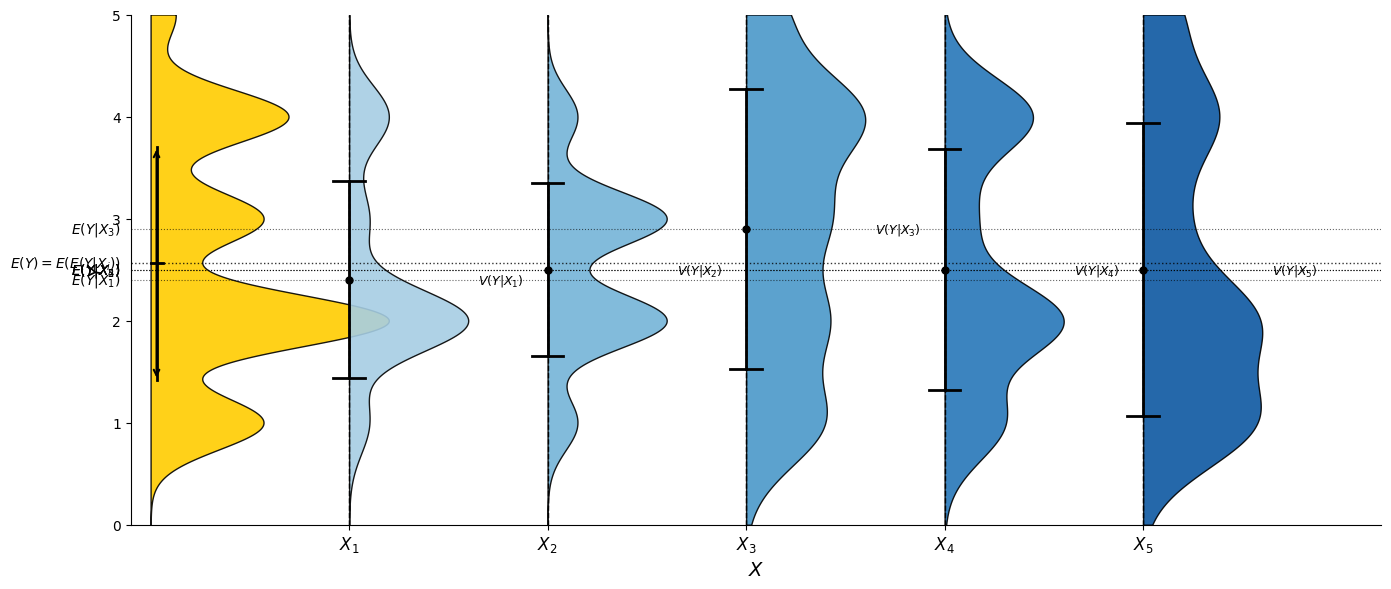

In [52]:
import fig.variance_plot as vp

# Convert each column of task_one_delay_df_male into an array inside a list
metrics_of_choice = task_one_delay_df_female

input_array_list = [metrics_of_choice[col].dropna().values for col in metrics_of_choice.columns]

# fig2, ax2 = vp.variance_decomposition_plot(example_arrays, bandwidth_adjust=0.5)
fig2, ax2 = vp.variance_decomposition_plot(input_array_list, bandwidth_adjust=0.5)
plt.show()